# Table of Contents
 <p><div class="lev1 toc-item"><a href="#Aim" data-toc-modified-id="Aim-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Aim</a></div><div class="lev1 toc-item"><a href="#Create-the-network-&quot;edges&quot;-----pairs-of-aiports-forming-the-trips" data-toc-modified-id="Create-the-network-&quot;edges&quot;-----pairs-of-aiports-forming-the-trips-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Create the network "edges" --- pairs of aiports forming the trips</a></div><div class="lev2 toc-item"><a href="#Data-tidying" data-toc-modified-id="Data-tidying-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Data tidying</a></div><div class="lev2 toc-item"><a href="#Most-frequent-&quot;trips&quot;-in-US-during-the-past-year" data-toc-modified-id="Most-frequent-&quot;trips&quot;-in-US-during-the-past-year-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Most frequent "trips" in US during the past year</a></div><div class="lev1 toc-item"><a href="#Create-undirected-graph----edges-ignoring-directionality" data-toc-modified-id="Create-undirected-graph----edges-ignoring-directionality-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Create undirected graph -- edges ignoring directionality</a></div><div class="lev2 toc-item"><a href="#Data-tidying" data-toc-modified-id="Data-tidying-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Data tidying</a></div><div class="lev2 toc-item"><a href="#Most-frequent-&quot;routes&quot;-in-US-during-the-past-year" data-toc-modified-id="Most-frequent-&quot;routes&quot;-in-US-during-the-past-year-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Most frequent "routes" in US during the past year</a></div><div class="lev1 toc-item"><a href="#Overview:-complex-networt-study-of-the-US-Airport-System" data-toc-modified-id="Overview:-complex-networt-study-of-the-US-Airport-System-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Overview: complex networt study of the US Airport System</a></div><div class="lev2 toc-item"><a href="#make_nx_graph:-create-networkx-graph-object" data-toc-modified-id="make_nx_graph:-create-networkx-graph-object-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>make_nx_graph: create networkx graph object</a></div><div class="lev2 toc-item"><a href="#compute_network_measures:-network-measures-characterizing-nodes-(airport)" data-toc-modified-id="compute_network_measures:-network-measures-characterizing-nodes-(airport)-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>compute_network_measures: network measures characterizing nodes (airport)</a></div><div class="lev2 toc-item"><a href="#Other-helper-functions" data-toc-modified-id="Other-helper-functions-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Other helper functions</a></div><div class="lev1 toc-item"><a href="#Complex-network-theory-in-action!" data-toc-modified-id="Complex-network-theory-in-action!-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Complex network theory in action!</a></div><div class="lev2 toc-item"><a href="#Power-law-analysis-of-centrality-measures" data-toc-modified-id="Power-law-analysis-of-centrality-measures-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Power law analysis of centrality measures</a></div><div class="lev2 toc-item"><a href="#Community-structure-among-the-Airport-network" data-toc-modified-id="Community-structure-among-the-Airport-network-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Community structure among the Airport network</a></div><div class="lev2 toc-item"><a href="#PageRank-Centrality-among-US-Airports" data-toc-modified-id="PageRank-Centrality-among-US-Airports-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>PageRank Centrality among US Airports</a></div><div class="lev2 toc-item"><a href="#Community-structure" data-toc-modified-id="Community-structure-5.4"><span class="toc-item-num">5.4&nbsp;&nbsp;</span>Community structure</a></div>

# Aim


In [1]:
%matplotlib inline

In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly
import plotly.plotly as py

# libraries for network analysis
import networkx as nx
import bct

from pprint import pprint
from IPython.display import display

import cufflinks as cf
cf.set_config_file(theme='ggplot',sharing='secret')

import util

# limit output to avoid cluttering screen
pd.options.display.max_rows = 20

In [3]:
period = '11/1/2015 to 10/31/2016'
outfile = 'network_analysis'

In [4]:
df_data = util.load_airport_data()
df_data.head()

 ... load dataframe from 2015-11.zip 
 ... load dataframe from 2015-12.zip 
 ... load dataframe from 2016-01.zip 
 ... load dataframe from 2016-02.zip 
 ... load dataframe from 2016-03.zip 
 ... load dataframe from 2016-04.zip 
 ... load dataframe from 2016-05.zip 
 ... load dataframe from 2016-06.zip 
 ... load dataframe from 2016-07.zip 
 ... load dataframe from 2016-08.zip 
 ... load dataframe from 2016-09.zip 
 ... load dataframe from 2016-10.zip 


,YEAR,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,ORIGIN_AIRPORT_ID,DEST_AIRPORT_ID
0,2015,4,11,4,3,14570,13930
1,2015,4,11,5,4,13930,14057
2,2015,4,11,6,5,13930,14057
3,2015,4,11,7,6,13930,14057
4,2015,4,11,8,7,13930,14057


In [5]:
df_lookup = pd.read_csv('df_lookup.csv') # lookup table for the AIRPORT_ID above

display(df_lookup.head())

,Code,Description,Airport,City,State,Region,lat,lon,City_State
0,10135,"Allentown/Bethlehem/Easton, PA: Lehigh Valley ...",Lehigh Valley International,Allentown/Bethlehem/Easton,PA,Northeast,40.651650,-75.434746,Allentown/Bethlehem/Easton (PA)
1,10136,"Abilene, TX: Abilene Regional",Abilene Regional,Abilene,TX,South,32.448736,-99.733144,Abilene (TX)
2,10140,"Albuquerque, NM: Albuquerque International Sun...",Albuquerque International Sunport,Albuquerque,NM,West,35.043333,-106.612909,Albuquerque (NM)
3,10141,"Aberdeen, SD: Aberdeen Regional",Aberdeen Regional,Aberdeen,SD,Midwest,45.453458,-98.417726,Aberdeen (SD)
4,10146,"Albany, GA: Southwest Georgia Regional",Southwest Georgia Regional,Albany,GA,South,31.535671,-84.193905,Albany (GA)


# Create the network "edges" --- pairs of aiports forming the trips

- this is a directed network in the language of graph theory

## Data tidying

In [6]:
# create a new column containing the *origin* and the *destination* airport
# (these will form the network "edges" in our graph, with airport being the nodes)
df_data['Trips'] = tuple(zip(df_data['ORIGIN_AIRPORT_ID'], df_data['DEST_AIRPORT_ID']))
df_data.head()

,YEAR,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,ORIGIN_AIRPORT_ID,DEST_AIRPORT_ID,Trips
0,2015,4,11,4,3,14570,13930,"(14570, 13930)"
1,2015,4,11,5,4,13930,14057,"(13930, 14057)"
2,2015,4,11,6,5,13930,14057,"(13930, 14057)"
3,2015,4,11,7,6,13930,14057,"(13930, 14057)"
4,2015,4,11,8,7,13930,14057,"(13930, 14057)"


In [7]:
# create table of "trip_counts" (sorted by most frequent trips)
trip_counts = df_data['Trips'].value_counts().to_frame('counts')
trip_counts.head()

,counts
"(14771, 12892)",17757
"(12892, 14771)",17409
"(12892, 12478)",12463
"(12478, 12892)",12461
"(12892, 12889)",11317


In [8]:
# create two columns for the pair of nodes forming the edge
trip_counts['code1'] = trip_counts.index.map(lambda x: x[0])
trip_counts['code2'] = trip_counts.index.map(lambda x: x[1])

trip_counts.reset_index(drop=True,inplace=True)
trip_counts.head()

,counts,code1,code2
0,17757,14771,12892
1,17409,12892,14771
2,12463,12892,12478
3,12461,12478,12892
4,11317,12892,12889


In [9]:
# create columns with corresponding airport information
columns = [u'Airport', u'City',u'State']

for col in columns:
    # create hash-table for ID lookup
    hash_table = df_lookup.set_index('Code')[col].to_dict()
    
    trip_counts[col + '1'] = trip_counts['code1'].map(lambda code: hash_table[code])
    trip_counts[col + '2'] = trip_counts['code2'].map(lambda code: hash_table[code])
    
# reorder columns (just personal preference)
cols = trip_counts.columns.tolist()
cols = [cols[0]] + cols[3:9] + cols[1:3]
trip_counts = trip_counts[cols]
trip_counts.head()

,counts,Airport1,Airport2,City1,City2,State1,State2,code1,code2
0,17757,San Francisco International,Los Angeles International,San Francisco,Los Angeles,CA,CA,14771,12892
1,17409,Los Angeles International,San Francisco International,Los Angeles,San Francisco,CA,CA,12892,14771
2,12463,Los Angeles International,John F. Kennedy International,Los Angeles,New York,CA,NY,12892,12478
3,12461,John F. Kennedy International,Los Angeles International,New York,Los Angeles,NY,CA,12478,12892
4,11317,Los Angeles International,McCarran International,Los Angeles,Las Vegas,CA,NV,12892,12889


- add distance associated with each trips (ie, distance between aiports in kilometers)
- to do this, we convert the pairs of lat/lon into distance using [Vincent's formula](https://en.wikipedia.org/wiki/Vincenty's_formulae)

In [10]:
# add distance associated with each trips (ie, distance between aiports)
# see https://en.wikipedia.org/wiki/Vincenty's_formulae
from geopy.distance import vincenty
dist_ = []

hash_lat = df_lookup.set_index('Code')['lat'].to_dict()
hash_lon = df_lookup.set_index('Code')['lon'].to_dict()
for code1,code2 in zip(trip_counts['code1'],trip_counts['code2']):
    coord1 = hash_lat[code1],hash_lon[code1]
    coord2 = hash_lat[code2],hash_lon[code2]
    dist_.append(vincenty(coord1,coord2).kilometers)
    
trip_counts['distance'] = dist_
trip_counts.head()

,counts,Airport1,Airport2,City1,City2,State1,State2,code1,code2,distance
0,17757,San Francisco International,Los Angeles International,San Francisco,Los Angeles,CA,CA,14771,12892,543.531637
1,17409,Los Angeles International,San Francisco International,Los Angeles,San Francisco,CA,CA,12892,14771,543.531637
2,12463,Los Angeles International,John F. Kennedy International,Los Angeles,New York,CA,NY,12892,12478,3983.079400
3,12461,John F. Kennedy International,Los Angeles International,New York,Los Angeles,NY,CA,12478,12892,3983.079400
4,11317,Los Angeles International,McCarran International,Los Angeles,Las Vegas,CA,NV,12892,12889,380.413047


## Most frequent "trips" in US during the past year

- now that we have an appropriate table, let's start exploring which trip (pair of airports) took place the most during Nov-1-2015 to Oct-31-2016

- let's first see the top 10 trips

In [11]:
print "{} unique trips made".format(trip_counts.shape[0])
print ' the top 10 flights during {} '.format(period).center(80,'=')
trip_counts.head(n=10)

4637 unique trips made
============== the top 10 flights during 11/1/2015 to 10/31/2016 ===============


,counts,Airport1,Airport2,City1,City2,State1,State2,code1,code2,distance
0,17757,San Francisco International,Los Angeles International,San Francisco,Los Angeles,CA,CA,14771,12892,543.531637
1,17409,Los Angeles International,San Francisco International,Los Angeles,San Francisco,CA,CA,12892,14771,543.531637
2,12463,Los Angeles International,John F. Kennedy International,Los Angeles,New York,CA,NY,12892,12478,3983.079400
3,12461,John F. Kennedy International,Los Angeles International,New York,Los Angeles,NY,CA,12478,12892,3983.079400
4,11317,Los Angeles International,McCarran International,Los Angeles,Las Vegas,CA,NV,12892,12889,380.413047
5,11298,McCarran International,Los Angeles International,Las Vegas,Los Angeles,NV,CA,12889,12892,380.413047
6,10245,Seattle/Tacoma International,Los Angeles International,Seattle,Los Angeles,WA,CA,14747,12892,1535.379400
7,10224,Los Angeles International,Seattle/Tacoma International,Los Angeles,Seattle,CA,WA,12892,14747,1535.379400
8,10057,LaGuardia,Chicago O'Hare International,New York,Chicago,NY,IL,12953,13930,1180.129320
9,9954,Chicago O'Hare International,LaGuardia,Chicago,New York,IL,NY,13930,12953,1180.129320


- the top trips comes in pair....which makes sense, as most flights are "round-trips"

- For instance, **SF to LA** (17757 flights) and **LA to SF** (17409 flights) were the most frequent made trip. 

  - As these values are very close, it's reasonable to say most of the flights were round trip
  
  - (the small difference in flight-counts can be due to missed flight, permanent relocation, etc)'
  
  
Let's next plot the top 500 trips.

In [12]:
# create hover-text object for plotly
def string_rank(ranking):
    headstr = 'Ranking: '
    if ranking == 1:
        return headstr + '1st'
    elif ranking == 2:
        return headstr + '2nd'
    elif ranking == 3:
        return headstr + '3rd'
    else:
        return headstr + str(ranking)+'th'
    
trip_counts['text'] = (trip_counts['Airport1'] 
              + ' to ' + trip_counts['Airport2']
              + '<br>' + trip_counts['City1'] + ' (' + trip_counts['State1'] + ')'
              + ' to ' + trip_counts['City2'] + ' (' + trip_counts['State2'] + ')'
              + '<br>Number of flight: ' + trip_counts['counts'].astype(str))

trip_counts['text'] = trip_counts['text'] + '<br>' + map(string_rank,trip_counts['text'].index + 1)
trip_counts['text'][:5].tolist()

['San Francisco International to Los Angeles International<br>San Francisco (CA) to Los Angeles (CA)<br>Number of flight: 17757<br>Ranking: 1st',
 'Los Angeles International to San Francisco International<br>Los Angeles (CA) to San Francisco (CA)<br>Number of flight: 17409<br>Ranking: 2nd',
 'Los Angeles International to John F. Kennedy International<br>Los Angeles (CA) to New York (NY)<br>Number of flight: 12463<br>Ranking: 3rd',
 'John F. Kennedy International to Los Angeles International<br>New York (NY) to Los Angeles (CA)<br>Number of flight: 12461<br>Ranking: 4th',
 'Los Angeles International to McCarran International<br>Los Angeles (CA) to Las Vegas (NV)<br>Number of flight: 11317<br>Ranking: 5th']

In [154]:
# trip_counts.iplot(kind='bar',columns=['counts'],text='text',filename='test')

# plot top_k
top_k = 500
trip_counts[:top_k].iplot(kind='bar',columns=['counts'],text='text',filename='test')

# Create undirected graph -- edges ignoring directionality

- In our next analysis, we'll drop **directionality** in our analysis

- That is, for any given trip (edge), we'll ignoring which airport was used for **take-off** and **landing**

- So the airport pair (SF,LA) will form an **undirected edge** with a value of 17757+17409 = 35166

- So to create an undirected graph, .we do the following:

  - For any airport pair ``A,B``, we identify the directed edges ``(A -> B)`` and ``(A <- B)``

  - The resulting undirected edge ``(A <-> B)`` will have the value ``(A -> B) + (A <- B)``

## Data tidying

In [15]:
trip_counts.head()

,counts,Airport1,Airport2,City1,City2,State1,State2,code1,code2,distance,text
0,17757,San Francisco International,Los Angeles International,San Francisco,Los Angeles,CA,CA,14771,12892,543.531637,San Francisco International to Los Angeles Int...
1,17409,Los Angeles International,San Francisco International,Los Angeles,San Francisco,CA,CA,12892,14771,543.531637,Los Angeles International to San Francisco Int...
2,12463,Los Angeles International,John F. Kennedy International,Los Angeles,New York,CA,NY,12892,12478,3983.079400,Los Angeles International to John F. Kennedy I...
3,12461,John F. Kennedy International,Los Angeles International,New York,Los Angeles,NY,CA,12478,12892,3983.079400,John F. Kennedy International to Los Angeles I...
4,11317,Los Angeles International,McCarran International,Los Angeles,Las Vegas,CA,NV,12892,12889,380.413047,Los Angeles International to McCarran Internat...


In [16]:
tmp = pd.Series(map(lambda pair: (min(pair), max(pair) ), 
                     zip(trip_counts['code1'],trip_counts['code2'])))

print tmp[:6]

# detect flights A->B and A<-B (flights sharing same pair of airport)
mask_AB = tmp.duplicated(keep='first') # edges A -> B
mask_BA = tmp.duplicated(keep='last')  # edges B -> A
mask_    = ~(mask_AB|mask_BA)         # some trips only have one direction

assert mask_AB.sum() == mask_BA.sum() 
assert trip_counts.shape[0] == (mask_AB.sum() + mask_BA.sum() + mask_.sum())

trips_AB = trip_counts[mask_AB]
trips_BA = trip_counts[mask_BA]
trip_neither = trip_counts[ ~(mask_AB|mask_BA)]

display(trips_AB.head())
display(trips_BA.head())
display(trip_neither.head())

0    (12892, 14771)
1    (12892, 14771)
2    (12478, 12892)
3    (12478, 12892)
4    (12889, 12892)
5    (12889, 12892)
dtype: object


,counts,Airport1,Airport2,City1,City2,State1,State2,code1,code2,distance,text
1,17409,Los Angeles International,San Francisco International,Los Angeles,San Francisco,CA,CA,12892,14771,543.531637,Los Angeles International to San Francisco Int...
3,12461,John F. Kennedy International,Los Angeles International,New York,Los Angeles,NY,CA,12478,12892,3983.079400,John F. Kennedy International to Los Angeles I...
5,11298,McCarran International,Los Angeles International,Las Vegas,Los Angeles,NV,CA,12889,12892,380.413047,McCarran International to Los Angeles Internat...
7,10224,Los Angeles International,Seattle/Tacoma International,Los Angeles,Seattle,CA,WA,12892,14747,1535.379400,Los Angeles International to Seattle/Tacoma In...
9,9954,Chicago O'Hare International,LaGuardia,Chicago,New York,IL,NY,13930,12953,1180.129320,Chicago O'Hare International to LaGuardia<br>C...


,counts,Airport1,Airport2,City1,City2,State1,State2,code1,code2,distance,text
0,17757,San Francisco International,Los Angeles International,San Francisco,Los Angeles,CA,CA,14771,12892,543.531637,San Francisco International to Los Angeles Int...
2,12463,Los Angeles International,John F. Kennedy International,Los Angeles,New York,CA,NY,12892,12478,3983.079400,Los Angeles International to John F. Kennedy I...
4,11317,Los Angeles International,McCarran International,Los Angeles,Las Vegas,CA,NV,12892,12889,380.413047,Los Angeles International to McCarran Internat...
6,10245,Seattle/Tacoma International,Los Angeles International,Seattle,Los Angeles,WA,CA,14747,12892,1535.379400,Seattle/Tacoma International to Los Angeles In...
8,10057,LaGuardia,Chicago O'Hare International,New York,Chicago,NY,IL,12953,13930,1180.129320,LaGuardia to Chicago O'Hare International<br>N...


,counts,Airport1,Airport2,City1,City2,State1,State2,code1,code2,distance,text
3241,366,Wiley Post/Will Rogers Memorial,Fairbanks International,Barrow,Fairbanks,AK,AK,10754,11630,809.595183,Wiley Post/Will Rogers Memorial to Fairbanks I...
3598,263,Devils Lake Regional,Denver International,Devils Lake,Denver,ND,CO,11447,11292,1028.249825,Devils Lake Regional to Denver International<b...
3607,261,Hattiesburg-Laurel Regional,Dallas/Fort Worth International,Hattiesburg/Laurel,Dallas/Fort Worth,MS,TX,14109,11298,751.719146,Hattiesburg-Laurel Regional to Dallas/Fort Wor...
4344,23,Washington Dulles International,San Antonio International,Washington,San Antonio,DC,TX,12264,14683,2192.125251,Washington Dulles International to San Antonio...
4365,16,Joslin Field - Magic Valley Regional,San Francisco International,Twin Falls,San Francisco,ID,CA,15389,14771,862.579453,Joslin Field - Magic Valley Regional to San Fr...


In [17]:
trips_AB = trip_counts[mask_AB]
trips_BA = trip_counts[mask_BA]
trip_neither = trip_counts[ ~(mask_AB|mask_BA)]

# this will serve as our final undirected graph
trip_counts_und = trips_AB.copy()

# to identify matching rows, swap code1,code2
trips_BA = trips_BA.rename(columns={'code1':'code2','code2':'code1'})[['counts','code1','code2']]

# now we can use the code pairs as merge-keys
trip_counts_und = trips_AB.merge(trips_BA, on=['code1','code2'],suffixes=['','_'])

trip_counts_und.head()

,counts,Airport1,Airport2,City1,City2,State1,State2,code1,code2,distance,text,counts_
0,17409,Los Angeles International,San Francisco International,Los Angeles,San Francisco,CA,CA,12892,14771,543.531637,Los Angeles International to San Francisco Int...,17757
1,12461,John F. Kennedy International,Los Angeles International,New York,Los Angeles,NY,CA,12478,12892,3983.079400,John F. Kennedy International to Los Angeles I...,12463
2,11298,McCarran International,Los Angeles International,Las Vegas,Los Angeles,NV,CA,12889,12892,380.413047,McCarran International to Los Angeles Internat...,11317
3,10224,Los Angeles International,Seattle/Tacoma International,Los Angeles,Seattle,CA,WA,12892,14747,1535.379400,Los Angeles International to Seattle/Tacoma In...,10245
4,9954,Chicago O'Hare International,LaGuardia,Chicago,New York,IL,NY,13930,12953,1180.129320,Chicago O'Hare International to LaGuardia<br>C...,10057


In [18]:
# now we can sum both directions of the edge to create our undirected graph :)
trip_counts_und['counts'] = trip_counts_und['counts'] + trip_counts_und['counts_']
del trip_counts_und['counts_']

# to complete, append the trips that only had one-way direction, and re-sort!
trip_counts_und = trip_counts_und.append(trip_neither).\
                      sort_values('counts',ascending=False).\
                      reset_index(drop=True)

# finaly undirected graph!
trip_counts_und.head(10)

,counts,Airport1,Airport2,City1,City2,State1,State2,code1,code2,distance,text
0,35166,Los Angeles International,San Francisco International,Los Angeles,San Francisco,CA,CA,12892,14771,543.531637,Los Angeles International to San Francisco Int...
1,24924,John F. Kennedy International,Los Angeles International,New York,Los Angeles,NY,CA,12478,12892,3983.079400,John F. Kennedy International to Los Angeles I...
2,22615,McCarran International,Los Angeles International,Las Vegas,Los Angeles,NV,CA,12889,12892,380.413047,McCarran International to Los Angeles Internat...
3,20469,Los Angeles International,Seattle/Tacoma International,Los Angeles,Seattle,CA,WA,12892,14747,1535.379400,Los Angeles International to Seattle/Tacoma In...
4,20011,Chicago O'Hare International,LaGuardia,Chicago,New York,IL,NY,13930,12953,1180.129320,Chicago O'Hare International to LaGuardia<br>C...
5,18254,Honolulu International,Kahului Airport,Honolulu,Kahului,HI,HI,12173,13830,162.094231,Honolulu International to Kahului Airport<br>H...
6,18244,San Francisco International,McCarran International,San Francisco,Las Vegas,CA,NV,14771,12889,666.370587,San Francisco International to McCarran Intern...
7,18141,Chicago O'Hare International,Los Angeles International,Chicago,Los Angeles,IL,CA,13930,12892,2807.429621,Chicago O'Hare International to Los Angeles In...
8,18093,Hartsfield-Jackson Atlanta International,Orlando International,Atlanta,Orlando,GA,FL,10397,13204,649.748804,Hartsfield-Jackson Atlanta International to Or...
9,17042,Ronald Reagan Washington National,Logan International,Washington,Boston,DC,MA,11278,10721,642.205372,Ronald Reagan Washington National to Logan Int...


## Most frequent "routes" in US during the past year

- To distinguish undirected edges from directed ones, I'll call the edges in the undirected graph **"routes"** , with the line of thinking that trips A->B and B->A shares the same *route*

- (I'll continue to call the directed edges **trips**)

In [19]:
route_counts = trip_counts_und

Let's analyze the most frequent **routes** during the period Nov-1-2015 to Oct-31-2016

In [20]:
print "{} unique routes".format(route_counts.shape[0])
print ' the top 10 flight-routes during {} '.format(period).center(80,'=')
route_counts.head(n=10)

2365 unique routes
=========== the top 10 flight-routes during 11/1/2015 to 10/31/2016 ============


,counts,Airport1,Airport2,City1,City2,State1,State2,code1,code2,distance,text
0,35166,Los Angeles International,San Francisco International,Los Angeles,San Francisco,CA,CA,12892,14771,543.531637,Los Angeles International to San Francisco Int...
1,24924,John F. Kennedy International,Los Angeles International,New York,Los Angeles,NY,CA,12478,12892,3983.079400,John F. Kennedy International to Los Angeles I...
2,22615,McCarran International,Los Angeles International,Las Vegas,Los Angeles,NV,CA,12889,12892,380.413047,McCarran International to Los Angeles Internat...
3,20469,Los Angeles International,Seattle/Tacoma International,Los Angeles,Seattle,CA,WA,12892,14747,1535.379400,Los Angeles International to Seattle/Tacoma In...
4,20011,Chicago O'Hare International,LaGuardia,Chicago,New York,IL,NY,13930,12953,1180.129320,Chicago O'Hare International to LaGuardia<br>C...
5,18254,Honolulu International,Kahului Airport,Honolulu,Kahului,HI,HI,12173,13830,162.094231,Honolulu International to Kahului Airport<br>H...
6,18244,San Francisco International,McCarran International,San Francisco,Las Vegas,CA,NV,14771,12889,666.370587,San Francisco International to McCarran Intern...
7,18141,Chicago O'Hare International,Los Angeles International,Chicago,Los Angeles,IL,CA,13930,12892,2807.429621,Chicago O'Hare International to Los Angeles In...
8,18093,Hartsfield-Jackson Atlanta International,Orlando International,Atlanta,Orlando,GA,FL,10397,13204,649.748804,Hartsfield-Jackson Atlanta International to Or...
9,17042,Ronald Reagan Washington National,Logan International,Washington,Boston,DC,MA,11278,10721,642.205372,Ronald Reagan Washington National to Logan Int...


In [21]:
route_counts['text'] = (  route_counts['Airport1'] 
              + ' <-> ' + route_counts['Airport2']
              + '<br>'  + route_counts['City1'] + ' (' + route_counts['State1'] + ')'
              + ' <-> ' + route_counts['City2'] + ' (' + route_counts['State2'] + ')'
              + '<br>Number of flights: ' + route_counts['counts'].astype(str))

route_counts['text'] = route_counts['text'] + '<br>' + map(string_rank,route_counts['text'].index + 1)
route_counts['text'][:5].tolist()

['Los Angeles International <-> San Francisco International<br>Los Angeles (CA) <-> San Francisco (CA)<br>Number of flights: 35166<br>Ranking: 1st',
 'John F. Kennedy International <-> Los Angeles International<br>New York (NY) <-> Los Angeles (CA)<br>Number of flights: 24924<br>Ranking: 2nd',
 'McCarran International <-> Los Angeles International<br>Las Vegas (NV) <-> Los Angeles (CA)<br>Number of flights: 22615<br>Ranking: 3rd',
 'Los Angeles International <-> Seattle/Tacoma International<br>Los Angeles (CA) <-> Seattle (WA)<br>Number of flights: 20469<br>Ranking: 4th',
 "Chicago O'Hare International <-> LaGuardia<br>Chicago (IL) <-> New York (NY)<br>Number of flights: 20011<br>Ranking: 5th"]

In [153]:
# route_counts.iplot(kind='bar',columns=['counts'],text='text',filename='test',color='cyan')

# plot top_k
top_k = 250
route_counts[:top_k].iplot(kind='bar',columns=['counts'],text='text',filename='test',color='cyan')

# Overview: complex networt study of the US Airport System

- complex network theory tools used for analysis

- remainder of section defines helper functions, please skip to next section for actual analysis




## make_nx_graph: create networkx graph object

In [27]:
def make_nx_graph(counts,df_lookup,digraph=False):
    """
    
    Parameters
    ----------
    counts : pandas.DataFrame
        Table containing the trip_counts (digraph) or route_counts (undirected graph)
        Use in network analysis scripts
    df_lookup : pandas.DataFrame
        Table 
    digraph : bool
        Is the graph directed? (default = False, so undirected)
    """
    if digraph:
        G = nx.DiGraph() # directed graph
    else: 
        G = nx.Graph()   # undirected graph

    # === provide node information === #
    # get unique set of nodes in the graph
    nodes = set(counts['code1'].unique().tolist() +
                counts['code2'].unique().tolist())
                
    G.add_nodes_from(nodes)
    
    # --- add airport name as node attribute (handy for analysis in Gephi) ---
    # --- to do this, need to pass a dictionary to networkx 
    hash_airport   = df_lookup.set_index('Code')['Airport'].to_dict()

    # filter away airport in the lookup-table not in the graph
    nodes_airport = {key:val for key,val in hash_airport.iteritems() if key in nodes}
    nx.set_node_attributes(G, 'airport', nodes_airport)
    
    # --- add airport latitude/longitude information --- 
    hash_lat       = df_lookup.set_index('Code')['lat'].to_dict()
    hash_lon       = df_lookup.set_index('Code')['lon'].to_dict()
    
    """ Warning (why the typecasting below is important)
    Pandas returns data type in numpy.float64 for floats, which is not 
    supported in ``networkx.write_gexf`` (learned this the hard way...)
    
    http://stackoverflow.com/questions/22037360/keyerror-when-writing-numpy-values-to-gexf-with-networkx
    """
    # apply filering with typecasting from numpy.float64 to float
    nodes_lat = {key:float(val) for key,val in hash_lat.iteritems() if key in nodes}
    nodes_lon = {key:float(val) for key,val in hash_lon.iteritems() if key in nodes}
    nx.set_node_attributes(G, 'lat', nodes_lat)
    nx.set_node_attributes(G, 'lon', nodes_lon)
    
    # === add weighted edge information (flight counts in our context) === #
    # to define edge, supply a 3-tuple of ``(node1,node2,dict(weight=edge))``
    edges = map(lambda x:(x[0],x[1], dict(weight=x[2])), 
                zip(counts['code1'], counts['code2'], counts['counts']))
    G.add_edges_from(edges)
    
    # === done! ready to return, except one more step! === 
    # instead of using the Airport_ID as the node-labels, let's instead use the
    # City+State information, which is unique so can be used as lookup-keys
    hash_citystate = df_lookup.set_index('Code')['City_State'].to_dict()
    nodes_citystate = {key:val for key,val in hash_citystate.iteritems() if key in nodes}
    G = nx.relabel_nodes(G,nodes_citystate)
    return G

## compute_network_measures: network measures characterizing nodes (airport)

In [156]:
def compute_network_measures(G,add_module_attr = True):
    """ Compute the following well known complex network measures.
    
    The measures characterizes individual nodes in the network
    (in  our context, characterizes the airport)
    
    - pagerank: Google page-rank centrality
    - eig_cent: Eigen-value centrality
    - bet_cent: Betweenness centrality
    - clust_coef: Clustering coefficient (only implemented for undirected graph)
    
    Parameters
    ----------
    G : networkx graph object
        networkx graph object returned from ``make_nx_graph``. 
        Can be directed or undirected.
    add_module_attr : bool
        Add module information to the input G inplace. 
        Helpful when wanting to export object as ``*.gexf`` file for 
        analysis in Gephi.
    """
    A = np.array(nx.to_numpy_matrix(G))
    
    degree_wei = A.sum(axis=0,dtype=int) # weighted degree 
    degree_bin = (A!=0).sum(axis=0)      # binary degree
    
    # community detection -> compute modularity groups
    module = bct.modularity_louvain_und(bct.normalize(A),seed=0)[0]
    
    # convert numpy array into dictionary with node-label
    degree_wei = {node:deg for node,deg in zip(G.nodes(), degree_wei)}
    degree_bin = {node:deg for node,deg in zip(G.nodes(), degree_bin)}
    module = {node:int(modu) for node,modu in zip(G.nodes(), module)}
    
    if add_module_attr:
        # add community label as node attributes 
        # (handy when exporting .gexf file)
        nx.set_node_attributes(G, 'modu', module)
    
    # nodal centrality measures
    pagerank = nx.pagerank(G)               # google page-rank
    eig_cent = nx.eigenvector_centrality(G) # eigenvalue centrality
    bet_cent = nx.betweenness_centrality(G) # betweennes centrality
    
    # create dictionary of each of the measures computed above
    # (to be convertd to dataframe at end)
    df_network = dict(pagerank=pagerank,
                      eig_cent=eig_cent,
                      bet_cent=bet_cent,
                      degree_wei=degree_wei,
                      degree_bin=degree_bin,
                      module=module)
                      
    if not isinstance(G, nx.classes.digraph.DiGraph):
        # clustering coefficient (tendency of a node to cluster together)
        # (not implemented for digraphs)
        clust_coef = nx.clustering(G,weight=G)
        df_network.update(dict(clust_coef=clust_coef))
    
    # all set! convert dict to dataframe and return :)
    return pd.DataFrame(df_network)

## Other helper functions

In [207]:
def string_rank(ranking):
    headstr = 'Ranking: '
    if ranking == 1:
        return headstr + '1st'
    elif ranking == 2:
        return headstr + '2nd'
    elif ranking == 3:
        return headstr + '3rd'
    else:
        return headstr + str(ranking)+'th'

def add_ranking_hover_text(df,column,description):
    hover_text = df['Airport'] + '<br>' \
               + df['City'] + ', ' + df['State'] + '<br>' \
               + description + ': ' + df[column].astype(str)

    df['text'] = (hover_text + '<br>' + map(string_rank,df.index+1)).tolist()
    
def get_base_plotly_layout():
    """ This layout will be used repeatedly """
    layout = dict(
            showlegend = True,
            legend = dict(
                font = dict(size=11),
                #bordercolor='rgb(0,0,0)',
                #borderwidth=1,
                orientation='h',
                x=0.5, y = 1.08, 
                xanchor='center', yanchor='top',
            ),
            geo = dict(
                scope='usa',
                projection=dict( type='albers usa' ),
                showland = True,
                landcolor = 'rgb(217, 217, 217)',
                subunitwidth=1,
                countrywidth=1,
                subunitcolor="rgb(255, 255, 255)",
                countrycolor="rgb(255, 255, 255)"
            ),
            margin = dict(b=0,l=0,r=0,t=125),
        )
    return layout

# Complex network theory in action!

In [174]:
measure_abbrev = {
    'bet_cent': 'Betweenness Centrality',
    'clust_coef': 'Clustering Coefficient',
    'degree_bin' : 'Binary Degree',
    'degree_wei' : 'Weighted Degree',
    'eig_cent': 'Eigenvalue Centrality',
    'pagerank': 'Google PageRank Cenrality',
    'module': 'Community membership'
}

In [168]:
G = make_nx_graph(route_counts,df_lookup,digraph=False)
df_network = compute_network_measures(G,add_module_attr=True)

df_network['module'] = df_network['module'].map(lambda num: 'Module '+str(num))
df_network.head()

,bet_cent,clust_coef,degree_bin,degree_wei,eig_cent,module,pagerank
Aberdeen (SD),0.000000e+00,0.000000,1,1484,0.001100,Module 4,0.000590
Abilene (TX),0.000000e+00,0.000000,1,1019,0.001120,Module 1,0.000548
Adak Island (AK),0.000000e+00,0.000000,1,210,0.000021,Module 2,0.000512
Aguadilla (PR),7.630803e-07,0.833333,4,3642,0.002570,Module 3,0.000696
Akron (OH),1.396953e-05,0.777778,9,11059,0.012991,Module 1,0.001239


In [160]:
FF = plotly.tools.FigureFactory
fig = FF.create_scatterplotmatrix(df_network,diag='histogram',index='module',width=1000,height=850)

py.iplot(fig)

This is the format of your plot grid:
[ (1,1) x1,y1 ]    [ (1,2) x2,y2 ]    [ (1,3) x3,y3 ]    [ (1,4) x4,y4 ]    [ (1,5) x5,y5 ]    [ (1,6) x6,y6 ]  
[ (2,1) x7,y7 ]    [ (2,2) x8,y8 ]    [ (2,3) x9,y9 ]    [ (2,4) x10,y10 ]  [ (2,5) x11,y11 ]  [ (2,6) x12,y12 ]
[ (3,1) x13,y13 ]  [ (3,2) x14,y14 ]  [ (3,3) x15,y15 ]  [ (3,4) x16,y16 ]  [ (3,5) x17,y17 ]  [ (3,6) x18,y18 ]
[ (4,1) x19,y19 ]  [ (4,2) x20,y20 ]  [ (4,3) x21,y21 ]  [ (4,4) x22,y22 ]  [ (4,5) x23,y23 ]  [ (4,6) x24,y24 ]
[ (5,1) x25,y25 ]  [ (5,2) x26,y26 ]  [ (5,3) x27,y27 ]  [ (5,4) x28,y28 ]  [ (5,5) x29,y29 ]  [ (5,6) x30,y30 ]
[ (6,1) x31,y31 ]  [ (6,2) x32,y32 ]  [ (6,3) x33,y33 ]  [ (6,4) x34,y34 ]  [ (6,5) x35,y35 ]  [ (6,6) x36,y36 ]



## Power law analysis of centrality measures

- below we focus only on undirected graph over the ``route_graph``, but I've found nearly identical result when analysing digraphs over ``trip_counts``

**CREDIT**: code inspired from Philip Singer's blog post.

http://www.philippsinger.info/?p=247


Calculating best minimal value for power law fit
Values less than or equal to 0 in data. Throwing out 0 or negative values
Calculating best minimal value for power law fit
Values less than or equal to 0 in data. Throwing out 0 or negative values
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit


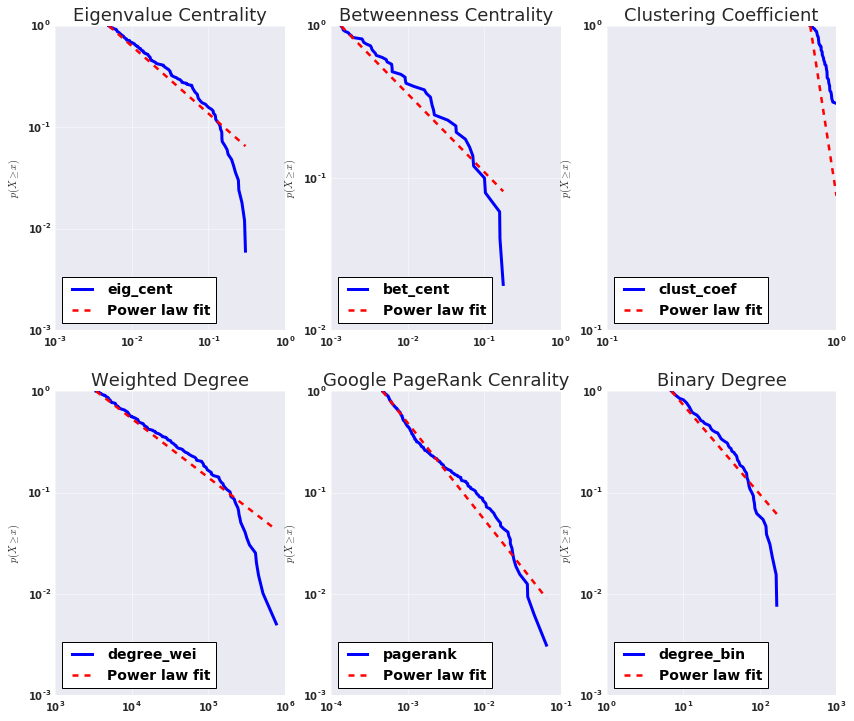

In [192]:
import powerlaw 

_,axes=util.sns_subplots(nrows=2,ncols=3,figsize=(14,12))

i=0
for measure in measure_abbrev:
    if measure == 'module': continue
    ax = axes[i]
    i+=1
    fit = powerlaw.Fit(df_network[measure])

    fit.plot_ccdf(linewidth=3, label=measure,ax=ax)
    fit.power_law.plot_ccdf(ax=ax, color='r', linestyle='--', label='Power law fit')

    ax.set_ylabel(r"$p(X\geq x)$")
    handles, labels = ax.get_legend_handles_labels()
    ax.legend(handles, labels, loc=3,fontsize=14)
    ax.set_title(measure_abbrev[measure])

## PageRank Centrality among US Airports

In [201]:
measure = 'pagerank'

df = df_network[measure].reset_index().rename(columns={'index':'City_State'})
df = df.merge(df_lookup,on='City_State').sort_values(by=measure,ascending=False).reset_index(drop=True)
df.head()

,City_State,pagerank,Code,Description,Airport,City,State,Region,lat,lon
0,Atlanta (GA),0.064983,10397,"Atlanta, GA: Hartsfield-Jackson Atlanta Intern...",Hartsfield-Jackson Atlanta International,Atlanta,GA,South,33.640728,-84.427700
1,Chicago (IL) [O'Hare],0.044911,13930,"Chicago, IL: Chicago O'Hare International",Chicago O'Hare International,Chicago,IL,Midwest,41.974162,-87.907321
2,Dallas/Fort Worth (TX),0.037017,11298,"Dallas/Fort Worth, TX: Dallas/Fort Worth Inter...",Dallas/Fort Worth International,Dallas/Fort Worth,TX,South,32.899809,-97.040335
3,Denver (CO),0.036630,11292,"Denver, CO: Denver International",Denver International,Denver,CO,West,39.856096,-104.673738
4,Los Angeles (CA),0.029119,12892,"Los Angeles, CA: Los Angeles International",Los Angeles International,Los Angeles,CA,West,33.941589,-118.408530


In [211]:
# remove illegal latitude locations from plotly
# (everything outside 50states+DC...so drops Virgin Island, Guam,Puerto rico, etc)
mask = df['lat']>=19
df_filtered = df[mask].reset_index(drop=True)

df_filtered = df_filtered.sort_values(by=[measure],ascending=False).reset_index(drop=True)
add_ranking_hover_text(df_filtered,measure,'PageRank Score')

In [213]:
ranking_group = [(0,10),(10,25),(25,50),(50,100),(100,300)]
scale = 0.00005 # scaling factor for the bubble plots

# colors for each ranking group
colors = ["rgb(0,116,217)","rgb(255,65,54)","rgb(133,20,75)","rgb(255,133,27)","lightgrey"]

data = []
for i in range(len(ranking_group)):
    lim = ranking_group[i]
    df_sub = df_filtered[lim[0]:lim[1]]
    airport = dict(
        type = 'scattergeo',
        locationmode = 'USA-states',
        lon = df_sub['lon'],lat = df_sub['lat'],
        text = df_sub['text'],
        marker = dict(size = df_sub[measure]/scale,sizemode = 'area',
            color = colors[i],line = dict(width=0.5, color='rgb(40,40,40)'),),
        name = 'Top {0} - {1}'.format(lim[0]+1,lim[1]) )
    data.append(airport)

layout = get_base_plotly_layout()
layout['title'] = 'Top 300 airports based on Page-rank Centrality Score ({})'.format(period)
layout['title']+= '<br>(hover for airport info; click legend below to toggle airports by ranking-class)'

fig = dict( data=data, layout=layout )
py.iplot( fig, validate=False, filename=outfile+'test' )

## Community structure

In [193]:
scale = 1000